# DS-SF-30 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [ ]:
# !conda install seaborn


In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [5]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [6]:
df.shape[0]# TODO

400

Answer:

> ### Question 2.  Create a summary table.

In [7]:
df.describe()# TODO

/Users/smarwaha/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [8]:
print df.gre.var()
print df.gpa.var()# TODO

13369.9530398
0.144879486222


Answer:

> ### Question 4.  Drop data points with missing data.

In [9]:
df = df.dropna()# Drop columns with at least 1 missing data points

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [10]:
df.isnull().sum()# TODO

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [11]:
df[df.duplicated()]

,admit,gre,gpa,prestige
59,0,600.0,2.82,4.0
77,1,800.0,4.00,3.0
202,1,700.0,4.00,1.0
263,1,620.0,3.95,3.0
398,0,700.0,3.65,2.0


Answer: because there are no more null values

> ### Question 6.  Create boxplots for `gre` and `gpa`.

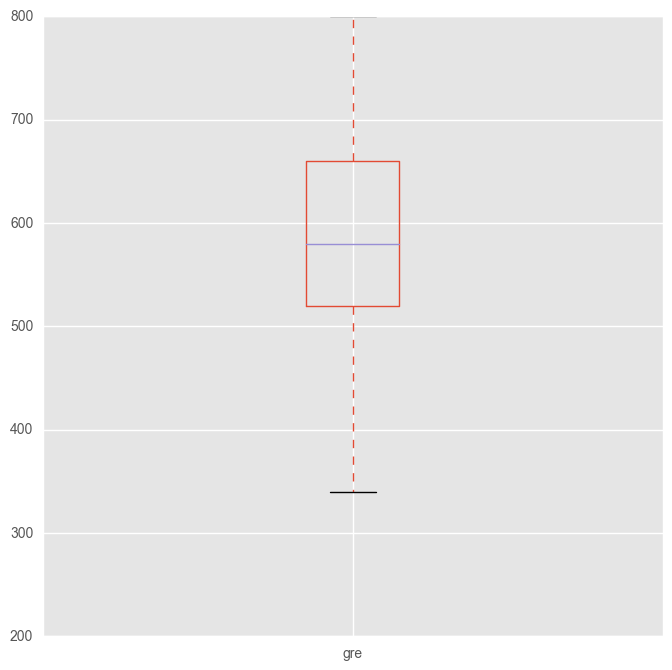

In [12]:
df.gre.plot(kind = 'box', figsize = (8, 8))

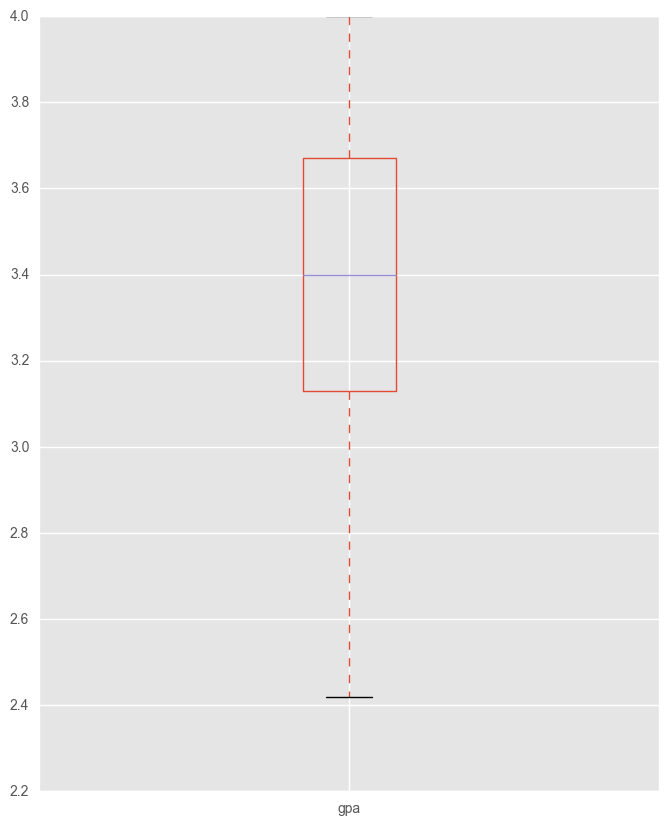

In [13]:
df.gpa.plot(kind = 'box', figsize = (8, 10))

> ### Question 7.  What do boxplots show?

Answer: They show that GPA has a fairly large IQR and its mean is a 3.4 gpa. GRE, a smaller IQR relative to the chart and has a few outliers we might consider throwing out

> ### Question 8.  Plot the distribution of each variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11849d6d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119a1e790>]], dtype=object)

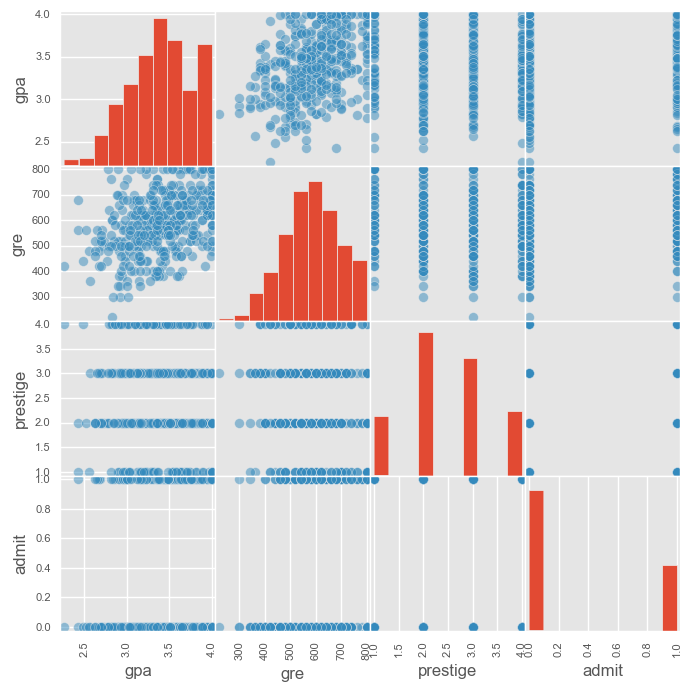

In [14]:
pd.tools.plotting.scatter_matrix(df[ ['gpa', 'gre','prestige','admit'] ], s = 200, figsize = (8, 8))

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

>We would not meet that assumption exactly as no sample is exactly a normal distribution. However, by plotting the two variables on a qqplot we can visualize that, for the most part, the data for GPA and GRE is normal. If the data was more skewed we may have needed to correct it.

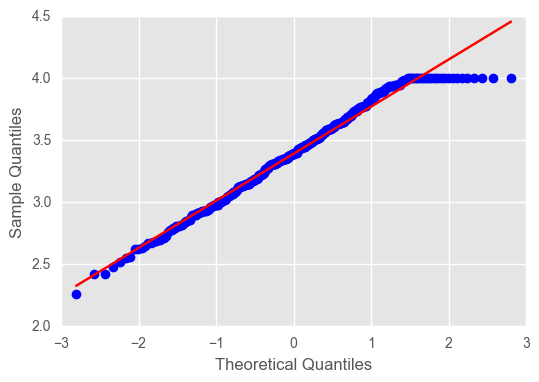

In [15]:
sm.qqplot(df.gpa, line = 's')
pass

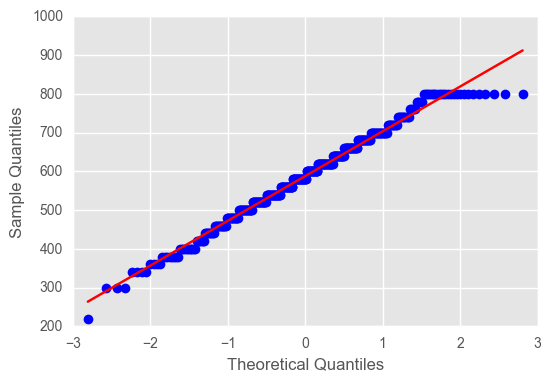

In [16]:
sm.qqplot(df.gre, line = 's')
pass

In [17]:
print df.gre.mean()
print df.gre.median()
print df.gre.std()

587.858942065
580.0
115.717787375


In [18]:
print df.gre.skew()
print df.gpa.skew()

-0.146046988216
-0.216888932969


In [19]:
help(sm)

Help on module statsmodels.api in statsmodels:

NAME
    statsmodels.api - Statistical models

FILE
    /Users/smarwaha/anaconda/lib/python2.7/site-packages/statsmodels/api.py

DESCRIPTION
     - standard `regression` models
    
      - `GLS` (generalized least squares regression)
      - `OLS` (ordinary least square regression)
      - `WLS` (weighted least square regression)
      - `GLASAR` (GLS with autoregressive errors model)
    
     - `GLM` (generalized linear models)
     - robust statistical models
    
      - `RLM` (robust linear models using M estimators)
      - `robust.norms` estimates
      - `robust.scale` estimates (MAD, Huber's proposal 2).
     - sandbox models
      - `mixed` effects models
      - `gam` (generalized additive models)




In [20]:
help(sm.qqplot)

Help on function qqplot in module statsmodels.graphics.gofplots:

qqplot(data, dist=<scipy.stats._continuous_distns.norm_gen object>, distargs=(), a=0, loc=0, scale=1, fit=False, line=None, ax=None)
    Q-Q plot of the quantiles of x versus the quantiles/ppf of a distribution.
    
    Can take arguments specifying the parameters for dist or fit them
    automatically. (See fit under Parameters.)
    
    Parameters
    ----------
    data : array-like
        1d data array
    dist : A scipy.stats or statsmodels distribution
        Compare x against dist. The default
        is scipy.stats.distributions.norm (a standard normal).
    distargs : tuple
        A tuple of arguments passed to dist to specify it fully
        so dist.ppf may be called.
    loc : float
        Location parameter for dist
    a : float
        Offset for the plotting position of an expected order statistic, for
        example. The plotting positions are given by (i - a)/(nobs - 2*a + 1)
        for i in ran

Answer:

> ### Question 10.  Create a correlation matrix for the dataset

In [21]:
df.corr() # TODO

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer:  Potentially GPA & GRE are colinear. I found Prestige has negative correlation with all variables which is something to investigate further.

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer: 
-Plot the Admit and Prestige on an X and Y and visualize their relationship and identify if there are any outliers
-Describe both variables and determine their medians
-Test to see if Prestige is a normally distributed sample
-Run an OLS model and determine if Prestige is a significant variable in predicting admission

> ### Question 13.  What is your hypothesis?

Answer: My hypothesis is that GPA and GRE are the drivers of admittance into UCLA's graduate school program.